# Hands-on Image Processing with Python
## Chapter 3: Convolution and Frequency domain Filtering

## Author: Sandipan Dey

### Import libraries

In [1]:
%matplotlib inline 
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
#from scipy.stats import signaltonoise
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit

def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

### Frequency domain Gaussian blur filter with numpy fft

<ipython-input-4-6347aa6a7401>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot(2,3,4), pylab.imshow( (20*np.log10( 0.1 + fp.fftshift(freq))).astype(int))
<ipython-input-4-6347aa6a7401>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot(2,3,5), pylab.imshow( (20*np.log10( 0.1 +
<ipython-input-4-6347aa6a7401>:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow( (20*np.log10( 0.1 + fp.fftshift(convolved))).astype(int))


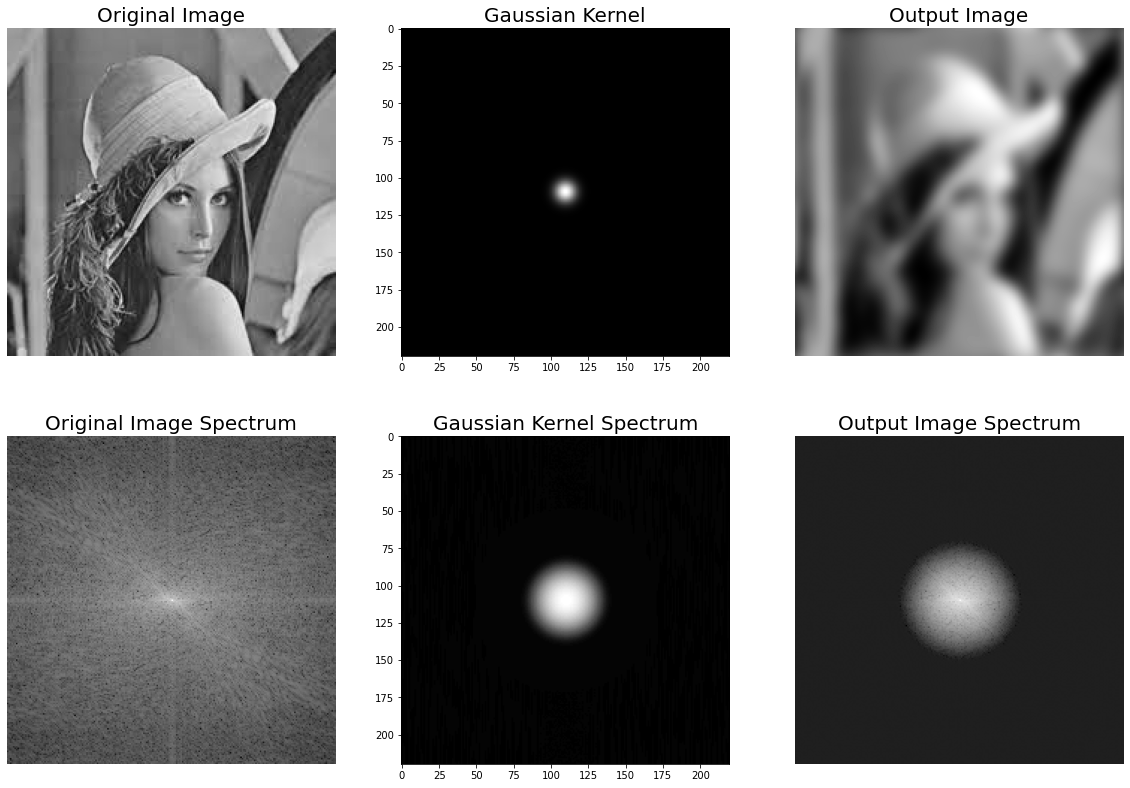

In [4]:
pylab.figure(figsize=(20,15))
pylab.gray() # show the filtered result in grayscale
im = np.mean(imread('../images/lena.jpg'), axis=2)
gauss_kernel = np.outer(signal.gaussian(im.shape[0], 5), signal.gaussian(im.shape[1], 5))
freq = fp.fft2(im)
assert(freq.shape == gauss_kernel.shape)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))
convolved = freq*freq_kernel # by the convolution theorem, simply multiply in the frequency domain
im1 = fp.ifft2(convolved).real
pylab.subplot(2,3,1), pylab.imshow(im), pylab.title('Original Image',
size=20), pylab.axis('off')
pylab.subplot(2,3,2), pylab.imshow(gauss_kernel), pylab.title('Gaussian Kernel', size=20)
pylab.subplot(2,3,3), pylab.imshow(im1) # the imaginary part is an artifact
pylab.title('Output Image', size=20), pylab.axis('off')
pylab.subplot(2,3,4), pylab.imshow( (20*np.log10( 0.1 + fp.fftshift(freq))).astype(int))
pylab.title('Original Image Spectrum', size=20), pylab.axis('off')
pylab.subplot(2,3,5), pylab.imshow( (20*np.log10( 0.1 +
fp.fftshift(freq_kernel))).astype(int))
pylab.title('Gaussian Kernel Spectrum', size=20), pylab.subplot(2,3,6)
pylab.imshow( (20*np.log10( 0.1 + fp.fftshift(convolved))).astype(int))
pylab.title('Output Image Spectrum', size=20), pylab.axis('off')
pylab.subplots_adjust(wspace=0.2, hspace=0)
pylab.show()

### Gaussian kernel in the frequency domain

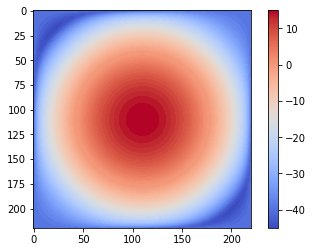

In [7]:
im = rgb2gray(imread('../images/lena.jpg'))
gauss_kernel = np.outer(signal.gaussian(im.shape[0], 1),
signal.gaussian(im.shape[1], 1))
freq = fp.fft2(im)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))
pylab.imshow( (20*np.log10( 0.01 +
fp.fftshift(freq_kernel))).real.astype(int), cmap='coolwarm') # 0.01 is added to keep the argument to log function always positive
pylab.colorbar()
pylab.show()

### Frequency domain Gaussian blur filter with scipy signal fftconvolve()

(224, 225)


<ipython-input-9-dc4c8c1037f7>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


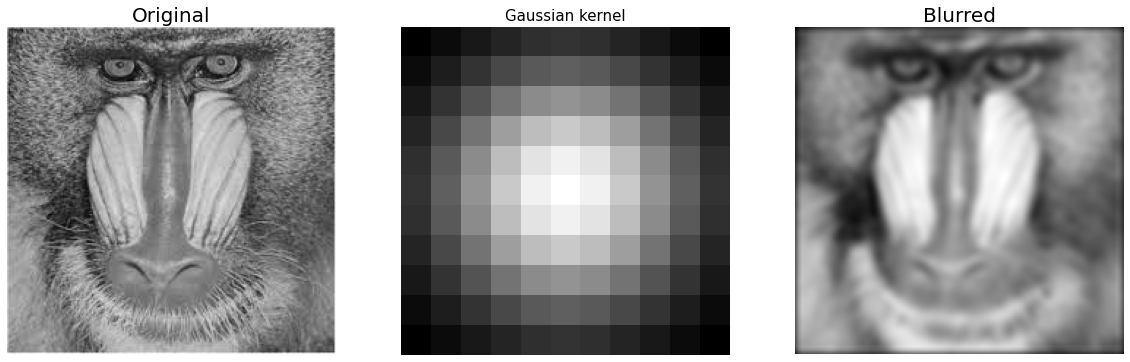

In [9]:
im = np.mean(imread('../images/mandrill.jpg'), axis=2)
print(im.shape)
# (224, 225)
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) # 2D Gaussian kernel of size 11x11 with σ = 3
im_blurred = signal.fftconvolve(im, gauss_kernel, mode='same')
fig, (ax_original, ax_kernel, ax_blurred) = pylab.subplots(1, 3, figsize=(20,8))
ax_original.imshow(im, cmap='gray')
ax_original.set_title('Original', size=20)
ax_original.set_axis_off()
ax_kernel.imshow(gauss_kernel)
ax_kernel.set_title('Gaussian kernel', size=15)
ax_kernel.set_axis_off()
ax_blurred.imshow(im_blurred, cmap='gray')
ax_blurred.set_title('Blurred', size=20)
ax_blurred.set_axis_off()
fig.show()

<ipython-input-10-dc027c8fa2a3>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot(1,2,1), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)
<ipython-input-10-dc027c8fa2a3>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot(1,2,2), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)


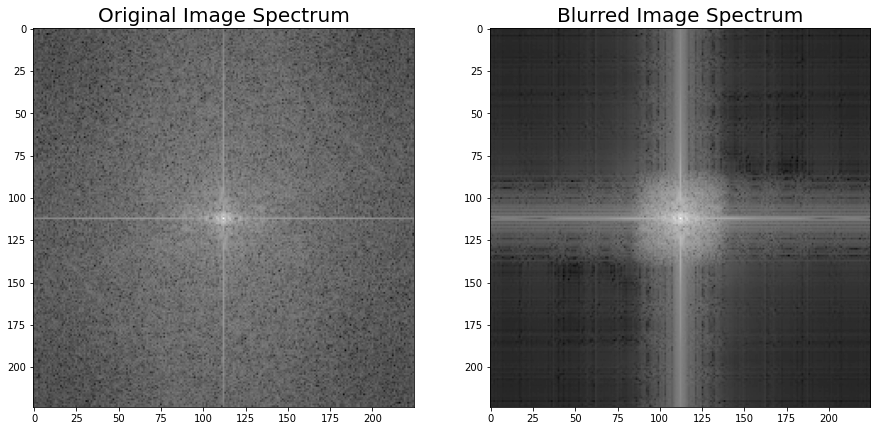

In [10]:
import scipy.fftpack as fftpack
F1 = fftpack.fft2((im).astype(float))
F2 = fftpack.fftshift( F1 )
pylab.figure(figsize=(15,8))
pylab.subplot(1,2,1), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)
pylab.title('Original Image Spectrum', size=20)
F1 = fftpack.fft2((im_blurred).astype(float))
F2 = fftpack.fftshift( F1 )
pylab.subplot(1,2,2), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)
pylab.title('Blurred Image Spectrum', size=20)
pylab.show()

### Comparing the runtimes of SciPy convolve() and fftconvolve() with the Gaussian blur kernel

(224, 225)


(<AxesSubplot:title={'center':'ffconvolve Output'}>,
 Text(0.5, 1.0, 'ffconvolve Output'),
 (-0.5, 224.5, 223.5, -0.5))

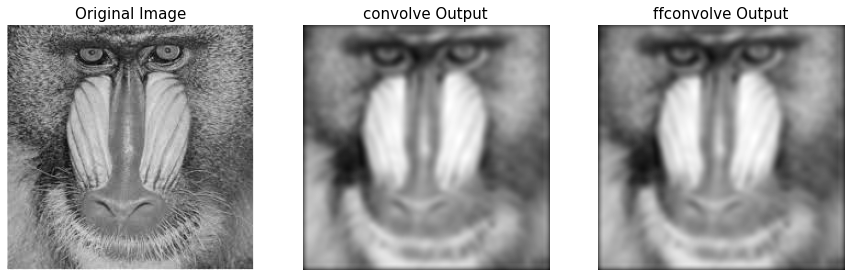

In [12]:
im = np.mean(imread('../images/mandrill.jpg'), axis=2)
print(im.shape)
# (224, 225)
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) # 2D Gaussian kernel of size 11x11 with σ = 3
im_blurred1 = signal.convolve(im, gauss_kernel, mode="same")
im_blurred2 = signal.fftconvolve(im, gauss_kernel, mode='same')
def wrapper_convolve(func):
    def wrapped_convolve():
        return func(im, gauss_kernel, mode="same")
    return wrapped_convolve
wrapped_convolve = wrapper_convolve(signal.convolve)
wrapped_fftconvolve = wrapper_convolve(signal.fftconvolve)
times1 = timeit.repeat(wrapped_convolve, number=1, repeat=100)
times2 = timeit.repeat(wrapped_fftconvolve, number=1, repeat=100)
pylab.figure(figsize=(15,5))
pylab.gray()
pylab.subplot(131), pylab.imshow(im), pylab.title('Original Image',size=15), pylab.axis('off')
pylab.subplot(132), pylab.imshow(im_blurred1), pylab.title('convolve Output', size=15), pylab.axis('off')
pylab.subplot(133), pylab.imshow(im_blurred2), pylab.title('ffconvolve Output', size=15),pylab.axis('off')

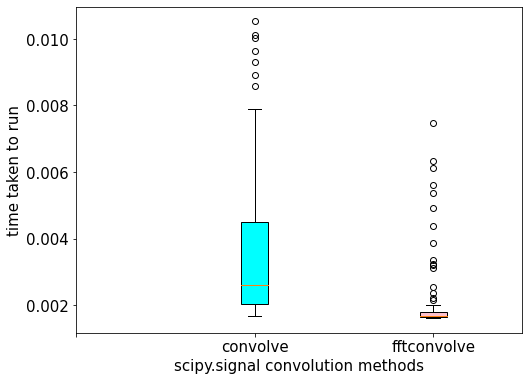

In [13]:
data = [times1, times2]
pylab.figure(figsize=(8,6))
box = pylab.boxplot(data, patch_artist=True) #notch=True,
colors = ['cyan', 'pink']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
pylab.xticks(np.arange(3), ('', 'convolve', 'fftconvolve'), size=15)
pylab.yticks(fontsize=15)
pylab.xlabel('scipy.signal convolution methods', size=15)
pylab.ylabel('time taken to run', size = 15)
pylab.show()

### High-Pass Filter (HPF)

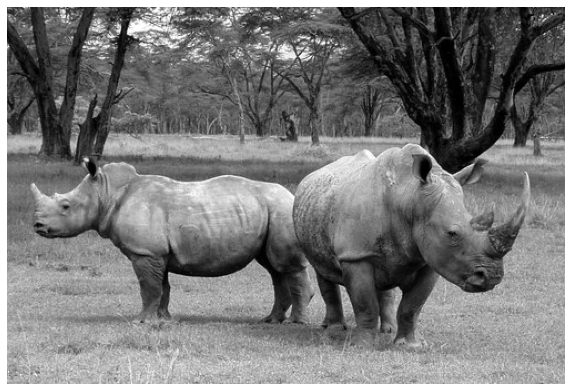

(<Figure size 720x720 with 1 Axes>,
 (-0.5, 502.5, 339.5, -0.5),
 None)

In [14]:
im = np.array(Image.open('../images/rhino.jpg').convert('L'))
pylab.figure(figsize=(10,10)), pylab.imshow(im, cmap=pylab.cm.gray), pylab.axis('off'), pylab.show()

<ipython-input-15-091b3091555e>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.figure(figsize=(10,10)), pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int)), pylab.show()


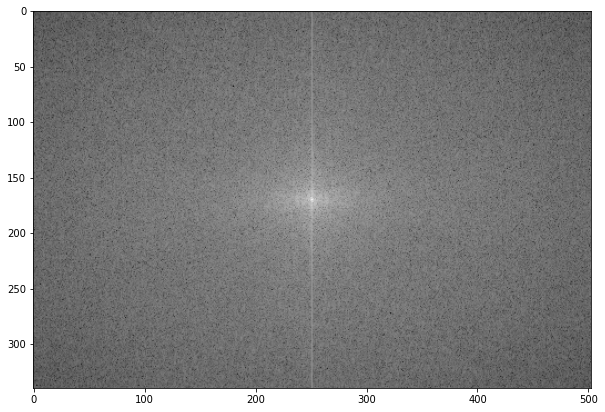

(<Figure size 720x720 with 1 Axes>,
 None)

In [15]:
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
freq1 = np.copy(freq)
freq2 = fp.fftshift(freq1)
pylab.figure(figsize=(10,10)), pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int)), pylab.show()

<ipython-input-16-b872ffab3ef4>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))


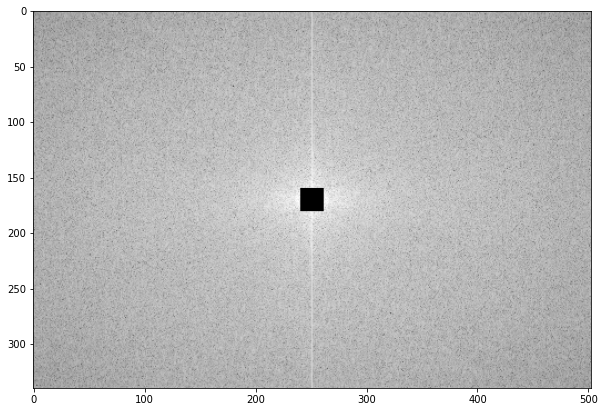

In [16]:
# apply HPF
freq2[half_w-10:half_w+11,half_h-10:half_h+11] = 0 # select all but the first 20x20 (low) frequencies
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))
pylab.show()

0.5900939025690546


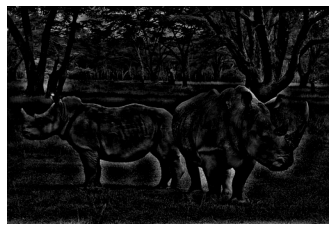

(<matplotlib.image.AxesImage at 0x7f494d375a00>,
 (-0.5, 502.5, 339.5, -0.5),
 None)

In [19]:
im1 = np.clip(fp.ifft2(fftpack.ifftshift(freq2)).real,0,255) # clip pixel values after IFFT
print(signaltonoise(im1, axis=None))
# 0.5901647786775175
pylab.imshow(im1, cmap='gray'), pylab.axis('off'), pylab.show()

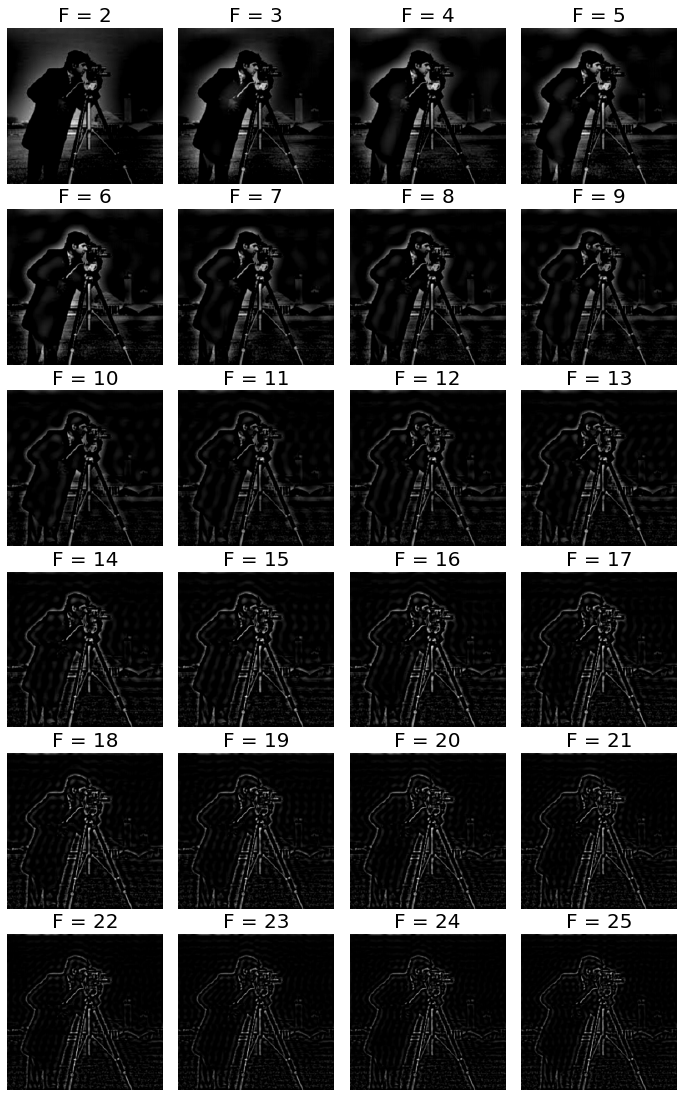

In [20]:
from scipy import fftpack
im = np.array(Image.open('../images/cameraman.jpg').convert('L'))
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
snrs_hp = []
lbs = list(range(1,25))
pylab.figure(figsize=(12,20))
for l in lbs:
    freq1 = np.copy(freq)
    freq2 = fftpack.fftshift(freq1)
    freq2[half_w-l:half_w+l+1,half_h-l:half_h+l+1] = 0 # select all but the first lxl (low) frequencies
    im1 = np.clip(fp.ifft2(fftpack.ifftshift(freq2)).real,0,255) # clip pixel values after IFFT
    snrs_hp.append(signaltonoise(im1, axis=None))
    pylab.subplot(6,4,l), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('F = ' + str(l+1), size=20)
pylab.subplots_adjust(wspace=0.1, hspace=0)
pylab.show()

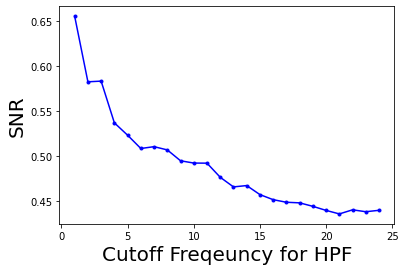

In [21]:
pylab.plot(lbs, snrs_hp, 'b.-')
pylab.xlabel('Cutoff Freqeuncy for HPF', size=20)
pylab.ylabel('SNR', size=20)
pylab.show()

### Low-pass filter (LPF)

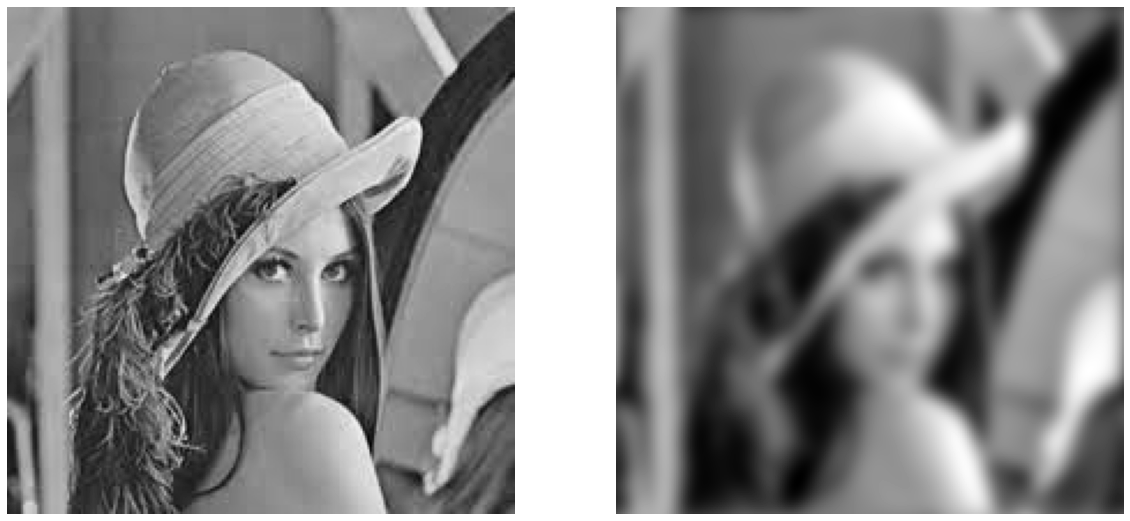

In [2]:
import numpy.fft as fp
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20,10))
pylab.gray() # show the result in grayscale
im = np.mean(imread('../images/lena.jpg'), axis=2)
freq = fp.fft2(im)
freq_gaussian = ndimage.fourier_gaussian(freq, sigma=4)
im1 = fp.ifft2(freq_gaussian)
axes1.imshow(im), axes1.axis('off'), axes2.imshow(im1.real) # the imaginary part is an artifact
axes2.axis('off')
pylab.show()

<ipython-input-3-ea0dc956bb4e>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow( (20*np.log10( 0.1 +


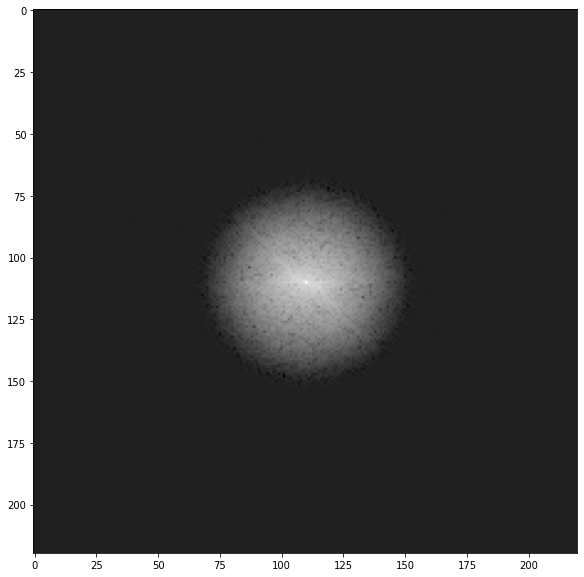

In [3]:
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 +
numpy.fft.fftshift(freq_gaussian))).astype(int))
pylab.show()

2.3991879574241466


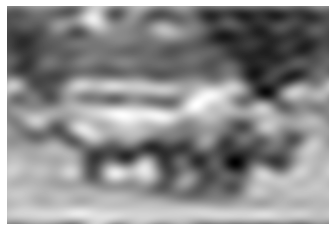

<ipython-input-4-6e3f7ef41726>:18: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))


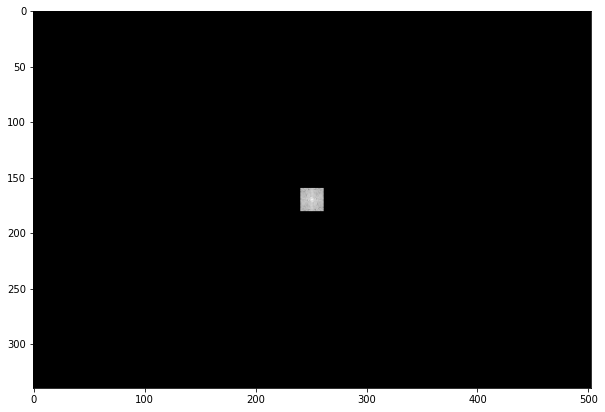

In [4]:
from scipy import fftpack
im = np.array(Image.open('../images/rhino.jpg').convert('L'))
# low pass filter
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
freq1 = np.copy(freq)
freq2 = fftpack.fftshift(freq1)
freq2_low = np.copy(freq2)
freq2_low[half_w-10:half_w+11,half_h-10:half_h+11] = 0 # block the lowfrequencies
freq2 -= freq2_low # select only the first 20x20 (low) frequencies, block the high frequencies
im1 = fp.ifft2(fftpack.ifftshift(freq2)).real
print(signaltonoise(im1, axis=None))
# 2.389151856495427
pylab.imshow(im1, cmap='gray'), pylab.axis('off')
pylab.show()
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))
pylab.show()

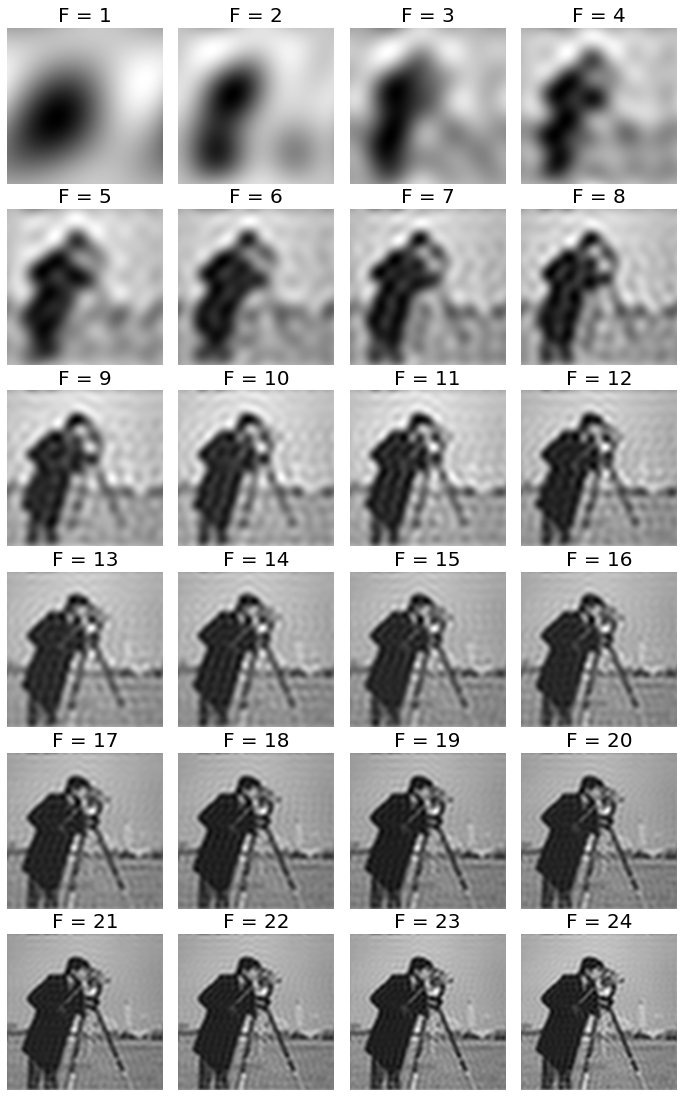

In [5]:
im = np.array(Image.open('../images/cameraman.jpg').convert('L'))
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
snrs_lp = []
ubs = list(range(1,25))
pylab.figure(figsize=(12,20))
for u in ubs:
    freq1 = np.copy(freq)
    freq2 = fftpack.fftshift(freq1)
    freq2_low = np.copy(freq2)
    freq2_low[half_w-u:half_w+u+1,half_h-u:half_h+u+1] = 0
    freq2 -= freq2_low # select only the first 20x20 (low) frequencies
    im1 = fp.ifft2(fftpack.ifftshift(freq2)).real
    snrs_lp.append(signaltonoise(im1, axis=None))
    pylab.subplot(6,4,u), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('F = ' + str(u), size=20)
pylab.subplots_adjust(wspace=0.1, hspace=0)
pylab.show()

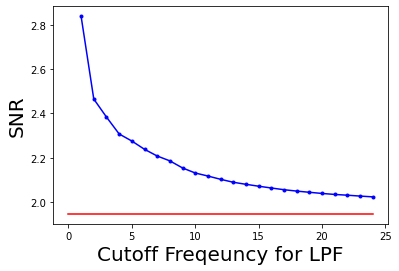

In [6]:
snr = signaltonoise(im, axis=None)
pylab.plot(ubs, snrs_lp, 'b.-')
pylab.plot(range(25), [snr]*25, 'r-')
pylab.xlabel('Cutoff Freqeuncy for LPF', size=20)
pylab.ylabel('SNR', size=20)
pylab.show()

### Band-pass filter (BPF) with DoG

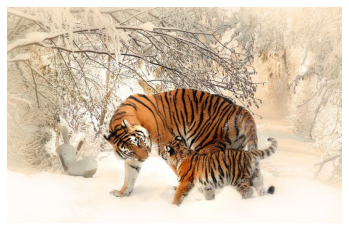

0.7862192363545744


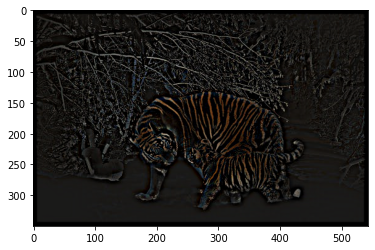

In [10]:
from skimage import img_as_float
im = img_as_float(pylab.imread('../images/tigers.jpeg'))
pylab.figure(), pylab.imshow(im), pylab.axis('off'), pylab.show()
x = np.linspace(-10, 10, 15)
kernel_1d = np.exp(-0.005*x**2)
kernel_1d /= np.trapz(kernel_1d) # normalize the sum to 1
gauss_kernel1 = kernel_1d[:, np.newaxis] * kernel_1d[np.newaxis, :]
kernel_1d = np.exp(-5*x**2)
kernel_1d /= np.trapz(kernel_1d) # normalize the sum to 1
gauss_kernel2 = kernel_1d[:, np.newaxis] * kernel_1d[np.newaxis, :]
DoGKernel = gauss_kernel1[:, :, np.newaxis] - gauss_kernel2[:, :, np.newaxis]
im = signal.fftconvolve(im, DoGKernel, mode='same')
pylab.figure(), pylab.imshow(np.clip(im, 0, 1)), print(np.max(im)),
pylab.show()

### Band-stop (notch) filter 

(340, 453)


<ipython-input-11-ae79e9c66e8f>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot(2,2,2), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)
<ipython-input-11-ae79e9c66e8f>:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot(2,2,4), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)


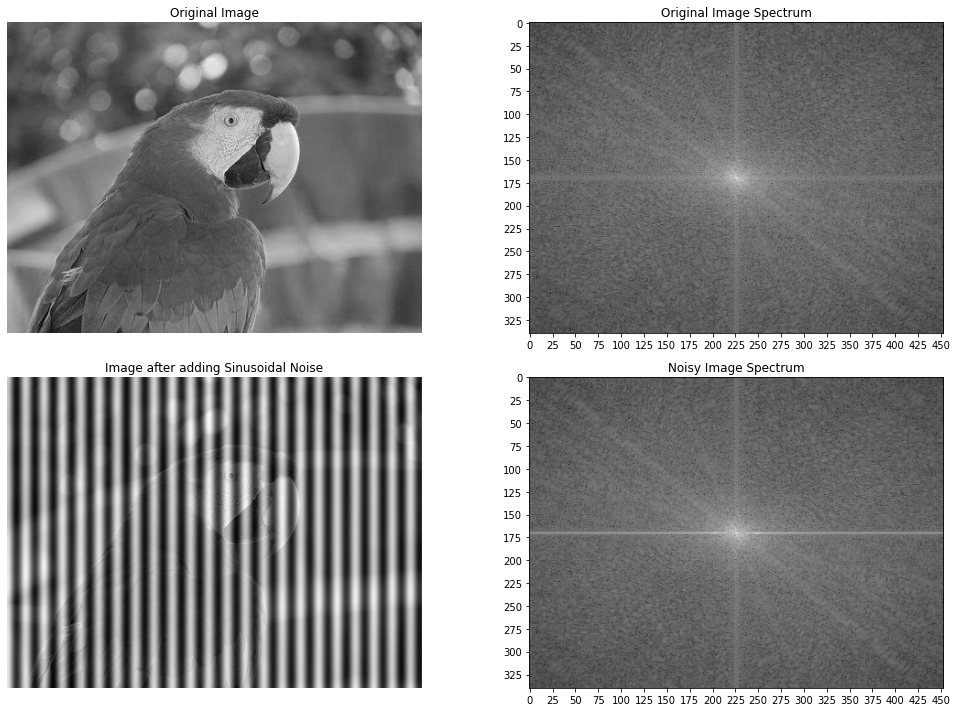

In [11]:
from scipy import fftpack
pylab.figure(figsize=(15,10))
im =  np.mean(imread("../images/parrot.png"), axis=2) / 255
print(im.shape)
pylab.subplot(2,2,1), pylab.imshow(im, cmap='gray'), pylab.axis('off')
pylab.title('Original Image')
F1 = fftpack.fft2((im).astype(float))
F2 = fftpack.fftshift( F1 )
pylab.subplot(2,2,2), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)
pylab.xticks(np.arange(0, im.shape[1], 25))
pylab.yticks(np.arange(0, im.shape[0], 25))
pylab.title('Original Image Spectrum')
# add periodic noise to the image
for n in range(im.shape[1]):
    im[:, n] += np.cos(0.1*np.pi*n)
pylab.subplot(2,2,3), pylab.imshow(im, cmap='gray'), pylab.axis('off')
pylab.title('Image after adding Sinusoidal Noise')
F1 = fftpack.fft2((im).astype(float)) # noisy spectrum
F2 = fftpack.fftshift( F1 )
pylab.subplot(2,2,4), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)
pylab.xticks(np.arange(0, im.shape[1], 25))
pylab.yticks(np.arange(0, im.shape[0], 25))
pylab.title('Noisy Image Spectrum')
pylab.tight_layout()
pylab.show()

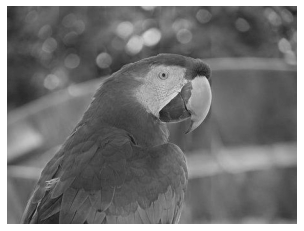

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x7ff146b99ee0>, None)

In [12]:
F2[170:176,:220] = F2[170:176,230:] = 0 # eliminate the frequencies most likely responsible for noise (keep some low frequency components)
im1 = fftpack.ifft2(fftpack.ifftshift( F2 )).real
pylab.axis('off'), pylab.imshow(im1, cmap='gray'), pylab.show()

### Image restoration

In [13]:
im = 255*rgb2gray(imread('../images/lena.jpg'))
gauss_kernel = np.outer(signal.gaussian(im.shape[0], 3),
signal.gaussian(im.shape[1], 3))
freq = fp.fft2(im)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel)) # this is our H
convolved = freq*freq_kernel # by convolution theorem
im_blur = fp.ifft2(convolved).real
im_blur = 255 * im_blur / np.max(im_blur) # normalize

243.7587 255.00000000000003


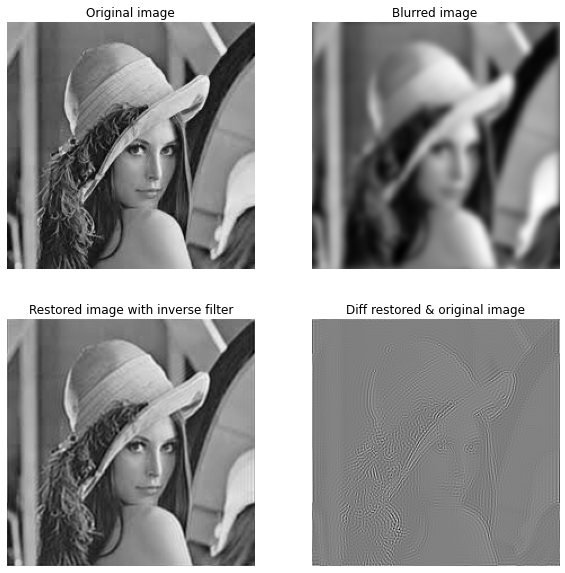

In [14]:
epsilon = 10**-6
freq = fp.fft2(im_blur)
freq_kernel = 1 / (epsilon + freq_kernel) # avoid division by zero
convolved = freq*freq_kernel
im_restored = fp.ifft2(convolved).real
im_restored = 255 * im_restored / np.max(im_restored)
print(np.max(im), np.max(im_restored))
pylab.figure(figsize=(10,10))
pylab.gray()
pylab.subplot(221), pylab.imshow(im), pylab.title('Original image'), pylab.axis('off')
pylab.subplot(222), pylab.imshow(im_blur), pylab.title('Blurred image'), pylab.axis('off')
pylab.subplot(223), pylab.imshow(im_restored), pylab.title('Restored image with inverse filter'), pylab.axis('off')
pylab.subplot(224), pylab.imshow(im_restored - im), pylab.title('Diff restored & original image'), pylab.axis('off')
pylab.show()

In [15]:
kernel_size = 21 # a 21 x 21 motion blurred kernel
mblur_kernel = np.zeros((kernel_size, kernel_size))
mblur_kernel[int((kernel_size-1)/2), :] = np.ones(kernel_size)
mblur_kernel = mblur_kernel / kernel_size
# expand the kernel by padding zeros

### Image deconvolution with the Wiener filter

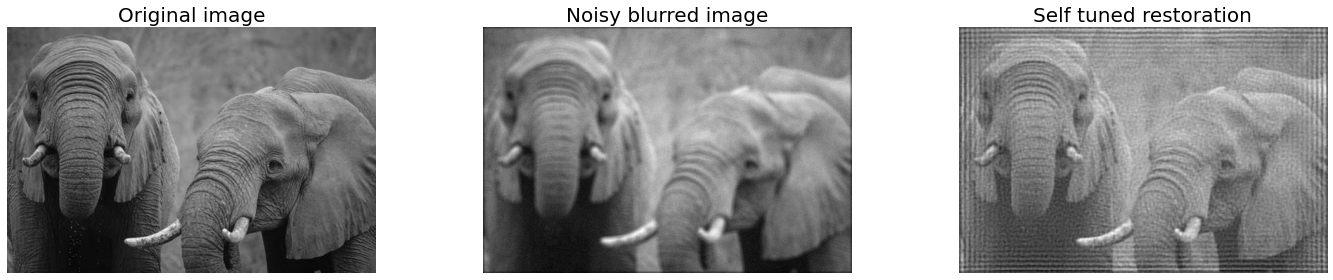

In [16]:
from skimage import color, data, restoration
im = color.rgb2gray(imread('../images/elephant_g.jpg'))
from scipy.signal import convolve2d as conv2
n = 7
psf = np.ones((n, n)) / n**2
im1 = conv2(im, psf, 'same')
im1 += 0.1 * im1.std() * np.random.standard_normal(im1.shape)
im2, _ = restoration.unsupervised_wiener(im1, psf)
fig, axes = pylab.subplots(nrows=1, ncols=3, figsize=(20, 4), sharex=True, sharey=True)
pylab.gray()
axes[0].imshow(im), axes[0].axis('off'), axes[0].set_title('Original image', size=20)
axes[1].imshow(im1), axes[1].axis('off'), axes[1].set_title('Noisy blurred image', size=20)
axes[2].imshow(im2), axes[2].axis('off'), axes[2].set_title('Self tuned restoration', size=20)
fig.tight_layout()
pylab.show()

### Image denoising with FFT

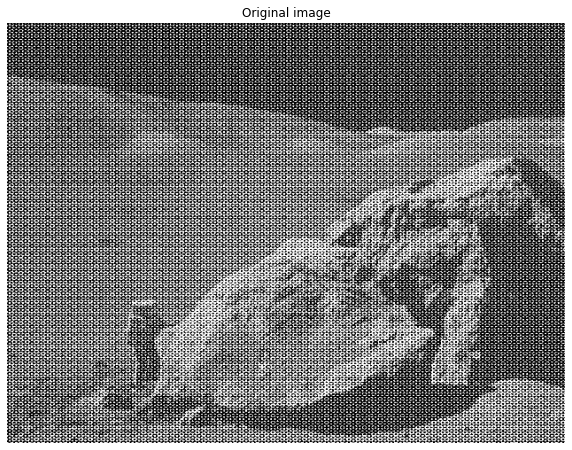

(<matplotlib.image.AxesImage at 0x7ff146c2b820>,
 (-0.5, 629.5, 473.5, -0.5),
 Text(0.5, 1.0, 'Original image'),
 None)

In [17]:
im = pylab.imread('../images/moonlanding.png').astype(float)
pylab.figure(figsize=(10,10))
pylab.imshow(im, pylab.cm.gray), pylab.axis('off'), pylab.title('Original image'), pylab.show()

Text(0.5, 1.0, 'Spectrum with Fourier transform')

<Figure size 432x288 with 0 Axes>

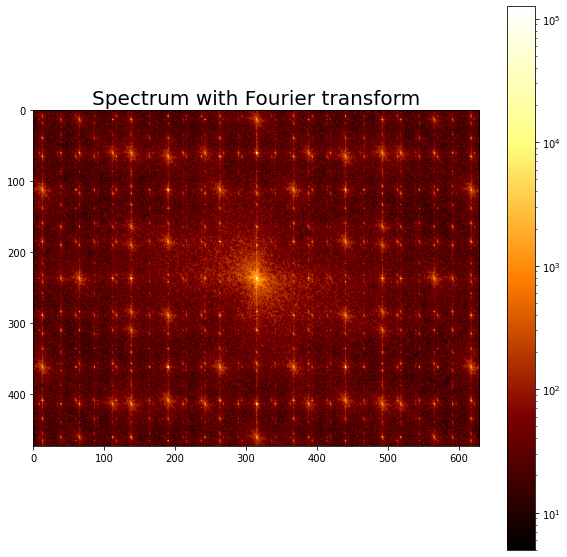

In [18]:
from scipy import fftpack
from matplotlib.colors import LogNorm
im_fft = fftpack.fft2(im)
def plot_spectrum(im_fft):
    pylab.figure(figsize=(10,10))
    pylab.imshow(np.abs(im_fft), norm=LogNorm(vmin=5), cmap=pylab.cm.afmhot), pylab.colorbar()
pylab.figure(), plot_spectrum(fftpack.fftshift(im_fft))
pylab.title('Spectrum with Fourier transform', size=20)

### Filter in FFT

(<Figure size 432x288 with 0 Axes>, None, Text(0.5, 1.0, 'Filtered Spectrum'))

<Figure size 432x288 with 0 Axes>

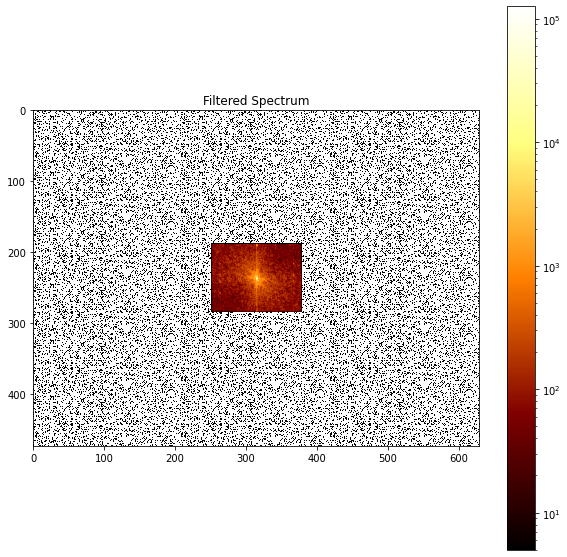

In [19]:
# Copy the original spectrum and truncate coefficients.
# Define the fraction of coefficients (in each direction) to keep as
keep_fraction = 0.1
im_fft2 = im_fft.copy()
# Set r and c to the number of rows and columns of the array.
r, c = im_fft2.shape
# Set all rows to zero with indices between r*keep_fraction and r*(1-keep_fraction)
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
# Similarly with the columns
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
pylab.figure(), plot_spectrum(fftpack.fftshift(im_fft2)),pylab.title('Filtered Spectrum')

### Reconstructing the final image

Text(0.5, 1.0, 'Reconstructed Image')

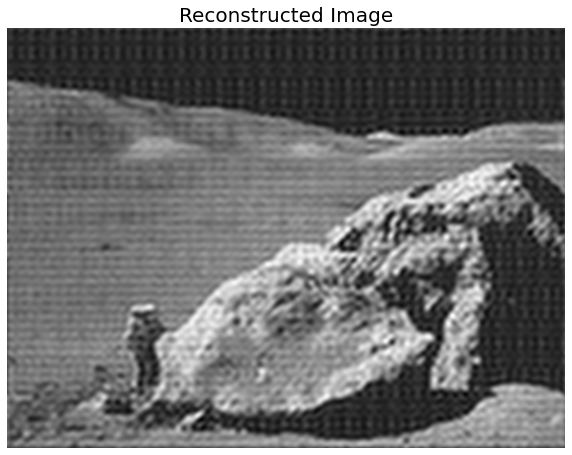

In [20]:
# Reconstruct the denoised image from the filtered spectrum, keep only the real part for display.
im_new = fp.ifft2(im_fft2).real
pylab.figure(figsize=(10,10)), pylab.imshow(im_new, pylab.cm.gray),
pylab.axis('off')
pylab.title('Reconstructed Image', size=20)